In [1]:
from dynamics.robot_selector import robot_selector
import numpy as np
from dynamics.data_gen_robot import data_gen_robot
import matplotlib.pyplot as plt

In [2]:
robot_name = "4R_3D"
params = {}
params['m'] = 1
params['I'] = np.eye(3)
params['l'] = 0.33
robot = robot_selector(robot_name, params)

In [3]:
print(robot)

DHRobot: 4R_3D, 4 joints (RRRR), dynamics, standard DH parameters
┌────┬────┬──────┬───────┐
│θⱼ  │ dⱼ │  aⱼ  │  ⍺ⱼ   │
├────┼────┼──────┼───────┤
│ q1 │  0 │ 0.33 │  0.0° │
│ q2 │  0 │ 0.33 │ 90.0° │
│ q3 │  0 │ 0.33 │  0.0° │
│ q4 │  0 │ 0.33 │  0.0° │
└────┴────┴──────┴───────┘

┌─┬──┐
└─┴──┘



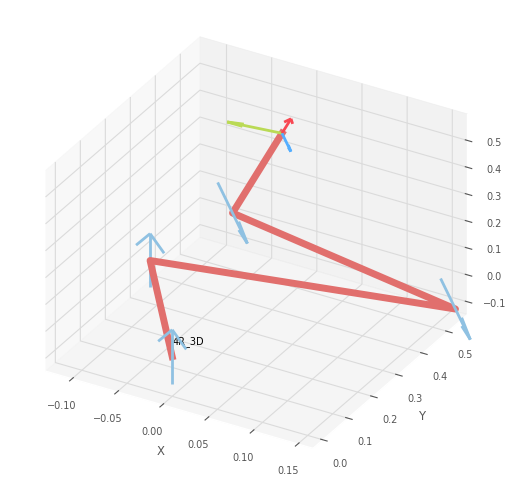

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, '4R_3D')

<Figure size 640x480 with 0 Axes>

In [4]:
q = robot.random_q()
robot.plot(q)

In [5]:
robot.name.__contains__("3D")

True

In [12]:
num_traj = 200
num_snaps = 1000
dt = 0.005
controller = 'controller'
num_states = robot.random_q().shape[0]
num_inputs = num_states

if robot.name.__contains__("2D"):
    num_states_cart = 2
else:
    num_states_cart = 3
T = np.linspace(0,num_snaps*dt,num_snaps)

In [13]:
X_end, X, U = data_gen_robot(dt,num_traj,num_snaps, robot, controller)

In [14]:
print(sum(sum(sum(np.isnan(X)))))

0


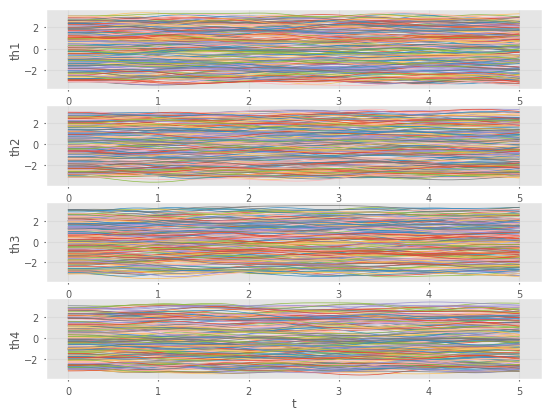

In [15]:
for j in range(num_traj):
    for i in range(int(num_states)):
        plt.subplot(num_states,1,i+1)
        plt.xlabel("t")
        plt.ylabel("th"+str(i+1))
        plt.plot(T,X[j,:,i])

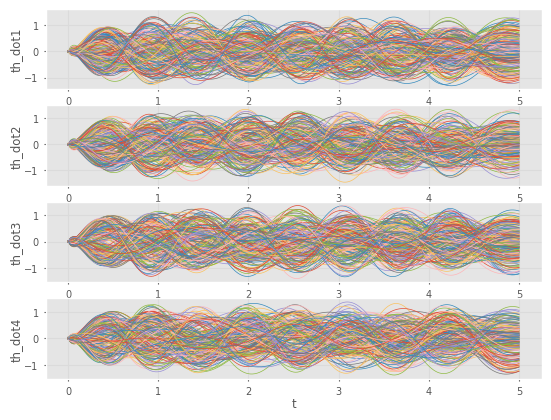

In [16]:
for j in range(num_traj):
    for i in range(int(num_states)):
        plt.subplot(num_states,1,i+1)
        plt.xlabel("t")
        plt.ylabel("th_dot"+str(i+1))
        plt.plot(T,X[j,:,num_states+i])

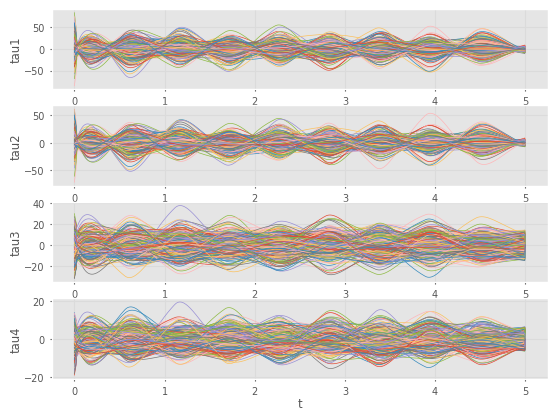

In [17]:
for j in range(num_traj):
    for i in range(int(num_states)):
        plt.subplot(num_states,1,i+1)
        plt.xlabel("t")
        plt.ylabel("tau"+str(i+1))
        plt.plot(T,U[j,:,i])